In [154]:
#Importing dataset
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from warnings import filterwarnings
filterwarnings(action='ignore')

In [155]:
data = pd.read_csv("Pima Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [156]:
diabetes_map = {True : 1, False : 0}
data['Outcome'] = data['Outcome'].map(diabetes_map)

In [157]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
print(data.shape)

(768, 9)


In [159]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [160]:
print(data.isna().sum())

 Pregnancies                0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
 Age                        0
Outcome                     0
dtype: int64


In [161]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [162]:
data.groupby(' Age').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825,0.079365
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625,0.152778
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579,0.184211
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565,0.173913
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500,0.291667
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455,0.242424
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750,0.250000
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629,0.285714
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897,0.448276


In [163]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

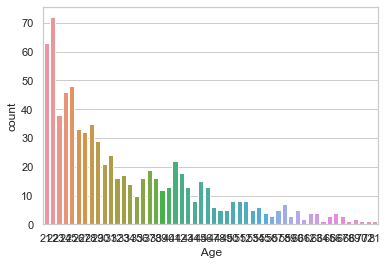

In [164]:
sns.countplot(data[' Age'])
plt.show()

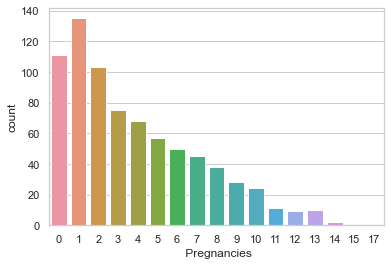

In [165]:
sns.countplot(data[' Pregnancies'])
plt.show()

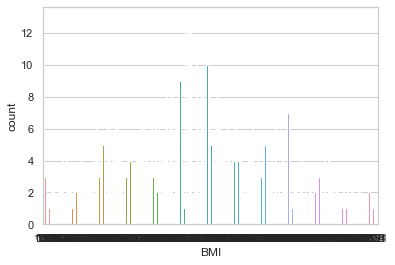

In [166]:
sns.countplot(data['BMI'])
plt.show()

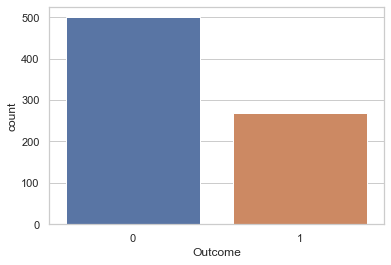

In [167]:
sns.countplot(data['Outcome'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Density'>

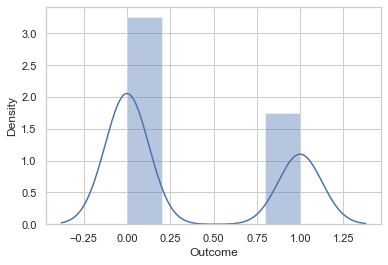

In [168]:
sns.distplot(data['Outcome'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

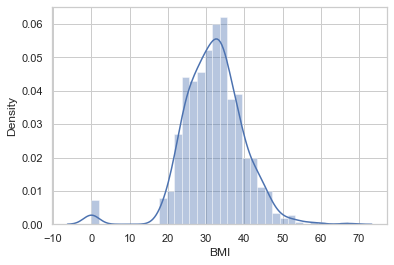

In [169]:
sns.distplot(data['BMI'])

<AxesSubplot:xlabel=' Pregnancies', ylabel='Density'>

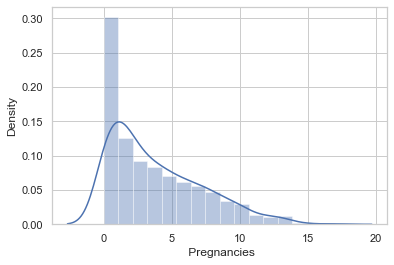

In [170]:
sns.distplot(data[' Pregnancies'])

<AxesSubplot:xlabel=' Age', ylabel='Density'>

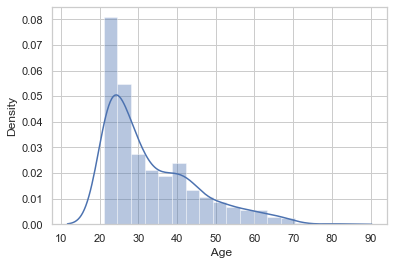

In [171]:
sns.distplot(data[' Age'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

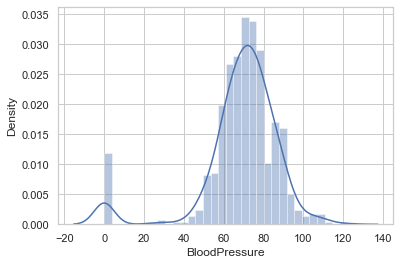

In [172]:
sns.distplot(data['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

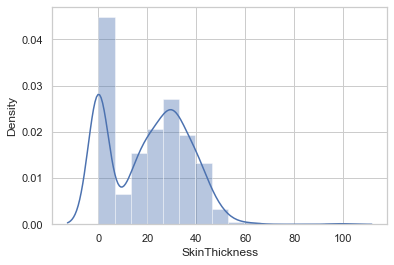

In [173]:
sns.distplot(data['SkinThickness'])

 Pregnancies                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
 Age                           AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

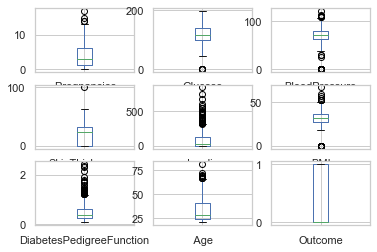

In [174]:
data.plot(kind ='box',subplots = True, layout =(3,3),sharex = False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

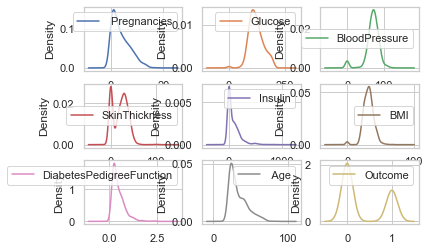

In [175]:
data.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

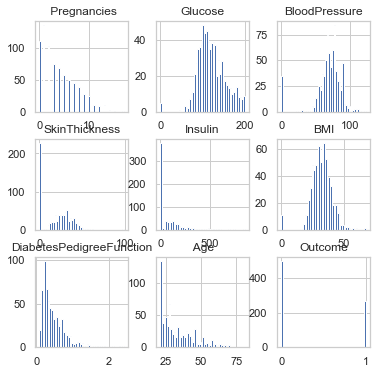

In [176]:
data.hist(figsize=(6,6),bins=50)
plt.show()

<AxesSubplot:>

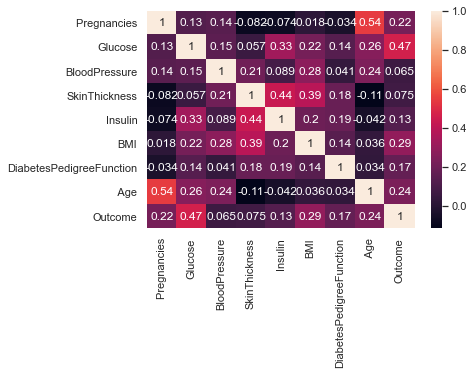

In [177]:
corr = data.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:>

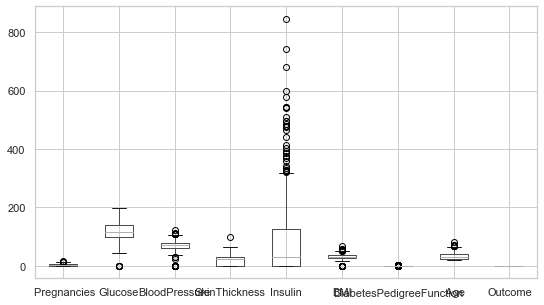

In [178]:
sns.set(style="whitegrid")
data.boxplot(figsize=(9,5))

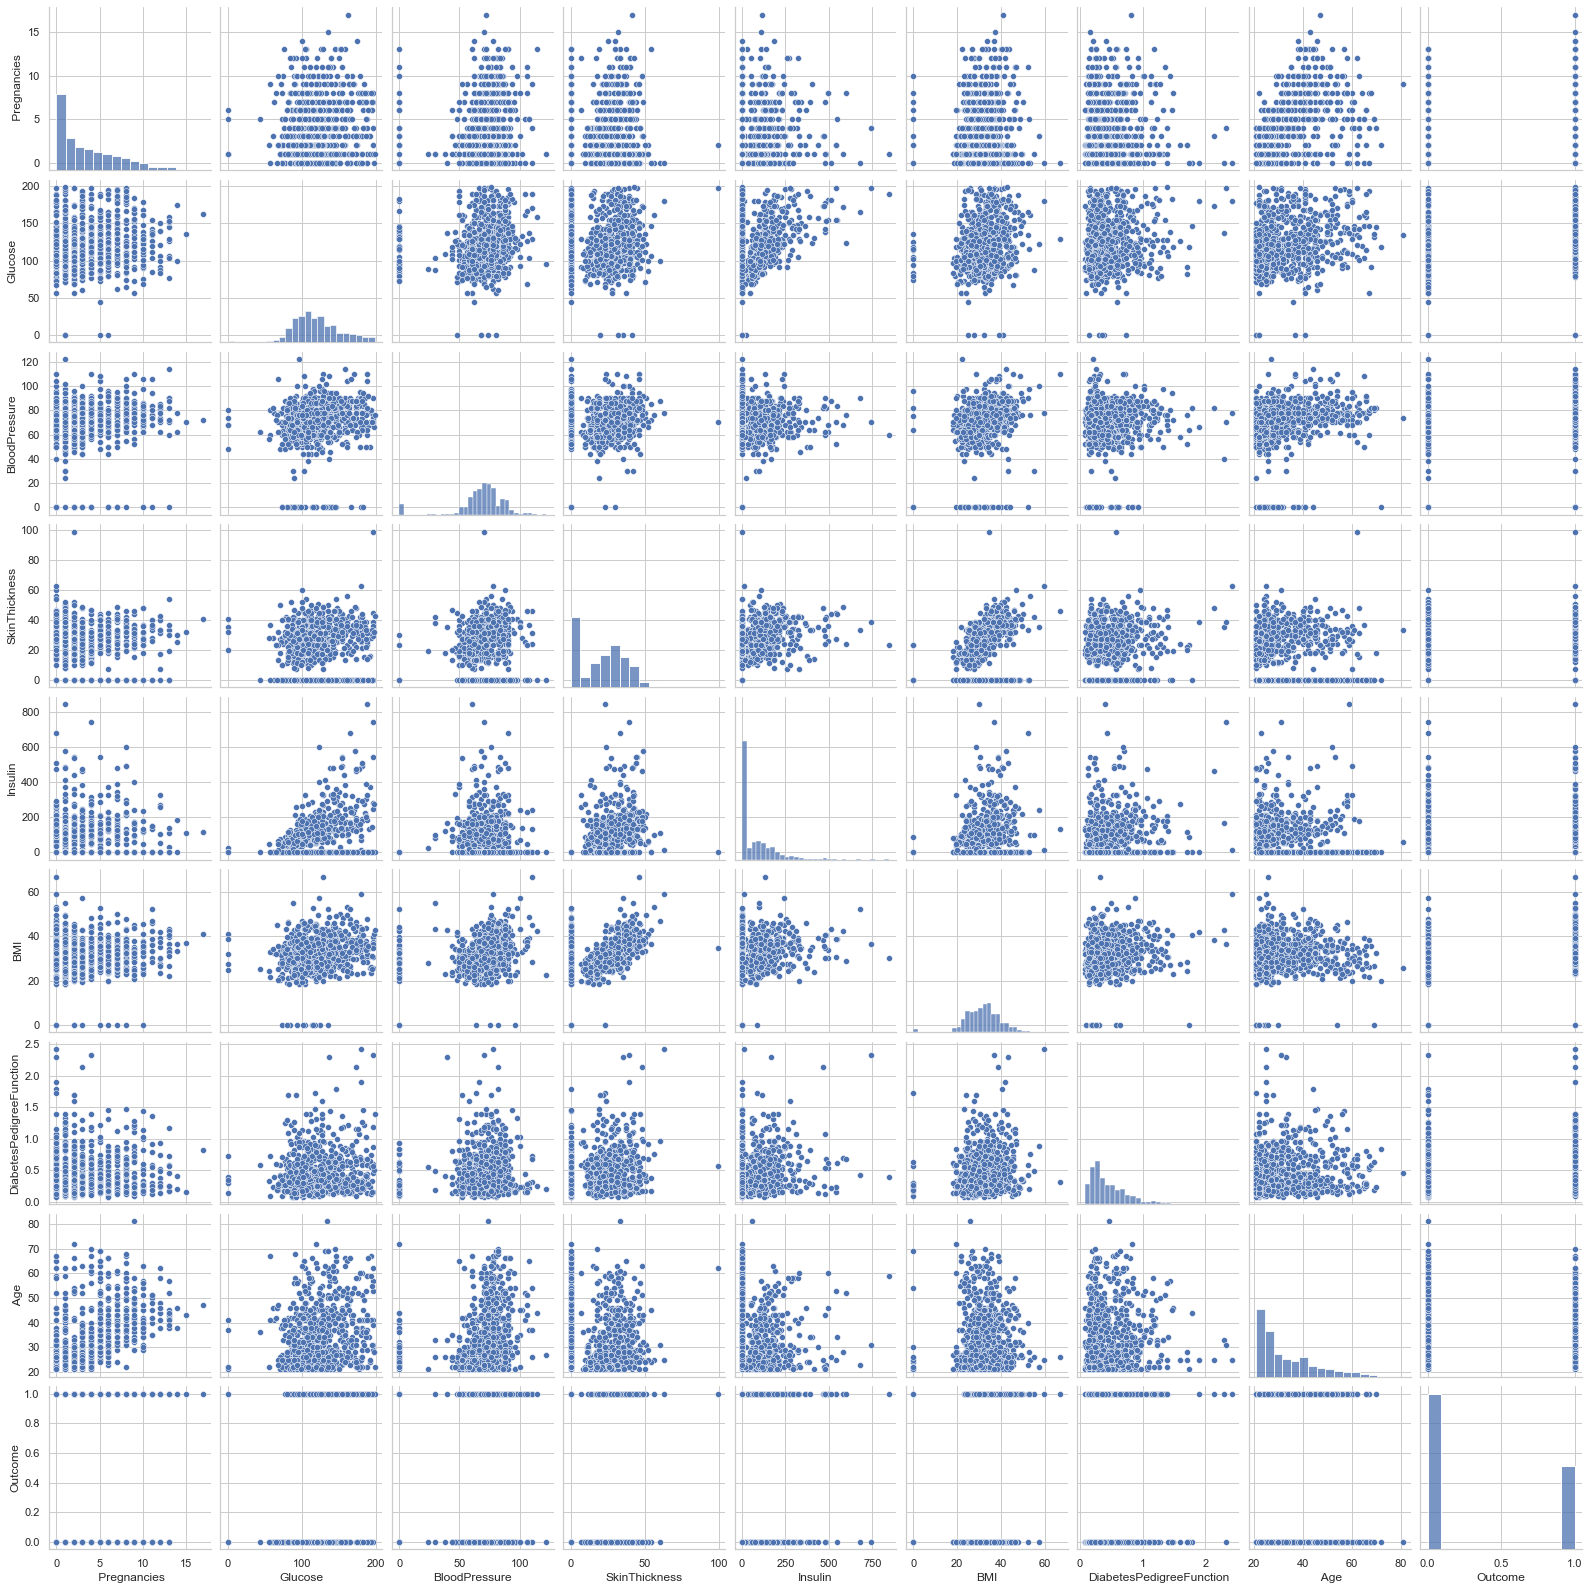

In [179]:
sns.pairplot(data)

<AxesSubplot:xlabel='Outcome', ylabel=' Age'>

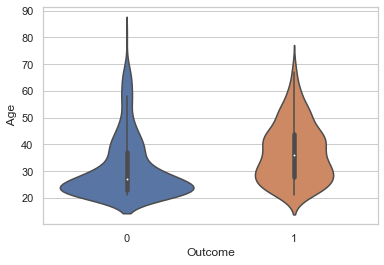

In [180]:
sns.violinplot(x='Outcome', y=' Age', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

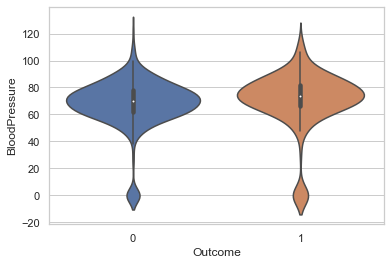

In [181]:
sns.violinplot(x='Outcome', y='BloodPressure', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

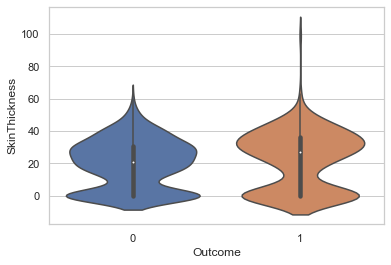

In [182]:
sns.violinplot(x='Outcome', y='SkinThickness', data=data)

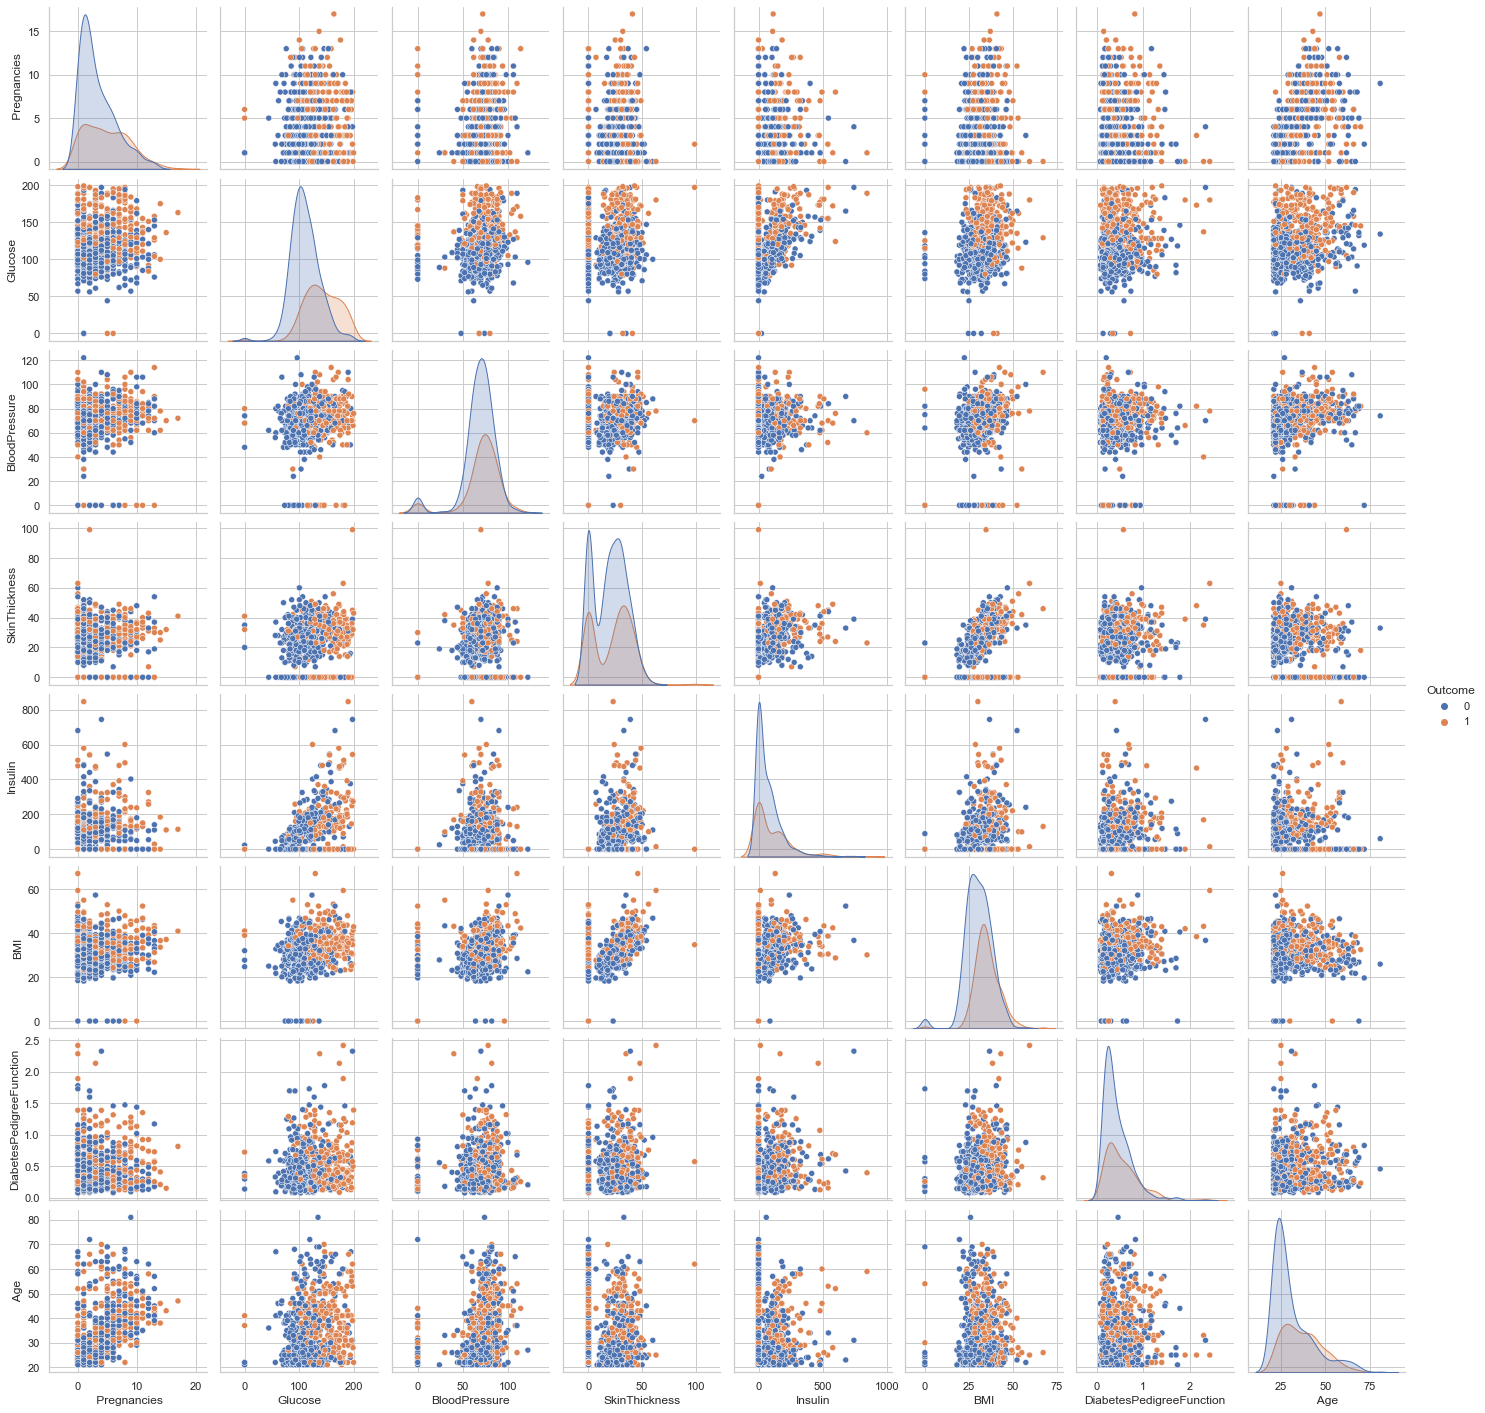

In [184]:
sns.pairplot(data,hue='Outcome')